In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [17]:
column_names = ["Time"]
exc_data_path = "Data/mash_exc300K.dat"

# DATA IMPORT - Using Pandas because it is easier to me
for i in range(1,8):
    column_names.append(str(i))
site_df = pd.read_csv(exc_data_path, delimiter=" ", names=column_names)
site_df = site_df[(site_df.index % 10 == 0) | (site_df.index == len(site_df.index) - 1)]
site_values = site_df.values
eq_pop = site_values[-1][1:8]
full_time = site_df["Time"].values

#Start time
# end_time_values = np.array(site_df['Time'].iloc[4::5])
end_time_values = np.array(site_df['Time'])
end_time_values =end_time_values[2:]
end_time_values = end_time_values[end_time_values<=1000]

In [18]:
row_counts = []
for end_times in end_time_values:
    count = len(site_df[site_df['Time'] <= end_times])
    row_counts.append(count)

row_counts = np.array(row_counts)


Text(0, 0.5, 'Residual Sum over Count')

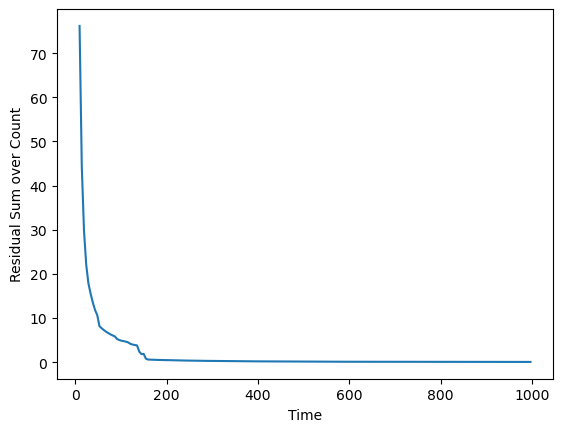

In [19]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/residual_data.dat")
residuals_per_count = residual_data[:,1]/row_counts

plt.plot(residual_data[:,0],residuals_per_count)

plt.xlabel("Time")
plt.ylabel("Residual Sum over Count")

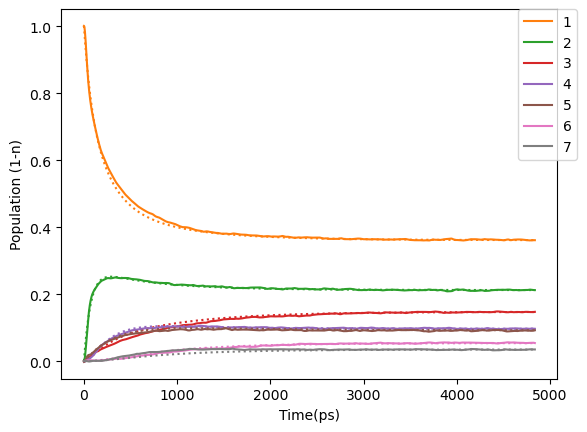

In [20]:
ls_data = np.loadtxt("Exc_residuals/203.18634897352192_41.dat")
exc_data = np.loadtxt(exc_data_path)
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    plt.plot(exc_data[:,0], exc_data[:,i],"-", label=column_name, color=c)
    plt.plot(ls_data[:,0],ls_data[:,i], ":",color=c)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show()

Text(0, 0.5, 'Residual Sum over Count')

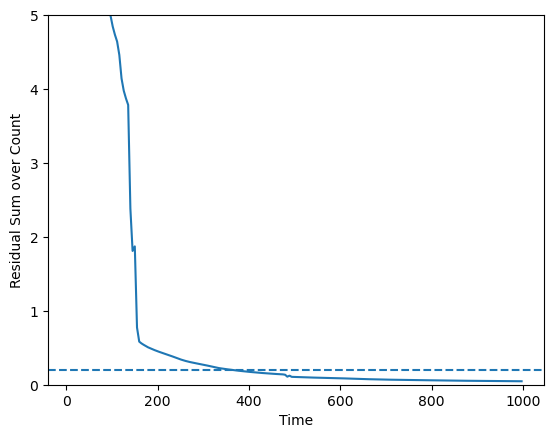

In [21]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/Divided_residuals/residualdivided_data.dat")

fig, ax = plt.subplots()
ax.axhline(y=0.2, linestyle="--")
plt.ylim(0,5)

plt.plot(residual_data[:,0],residuals_per_count)
plt.xlabel("Time")


plt.ylabel("Residual Sum over Count")

Text(0, 0.5, 'Residual Sum over Count')

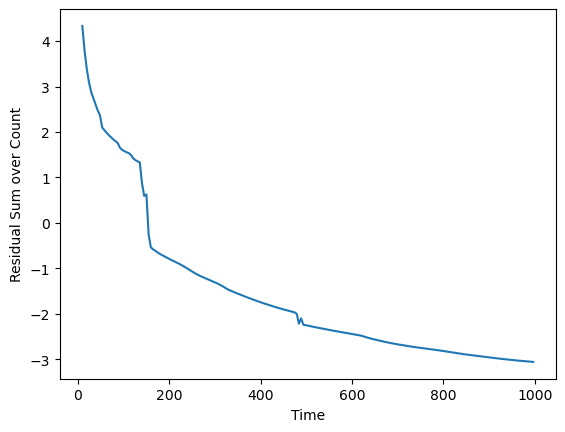

In [22]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/limited_population/residualdivided_data.dat")

# fig, ax = plt.subplots()
# ax.axhline(y=0.2, linestyle="--")
# plt.ylim(0,5)

plt.plot(residual_data[:,0],np.log(residuals_per_count))

plt.xlabel("Time")
plt.ylabel("Residual Sum over Count")

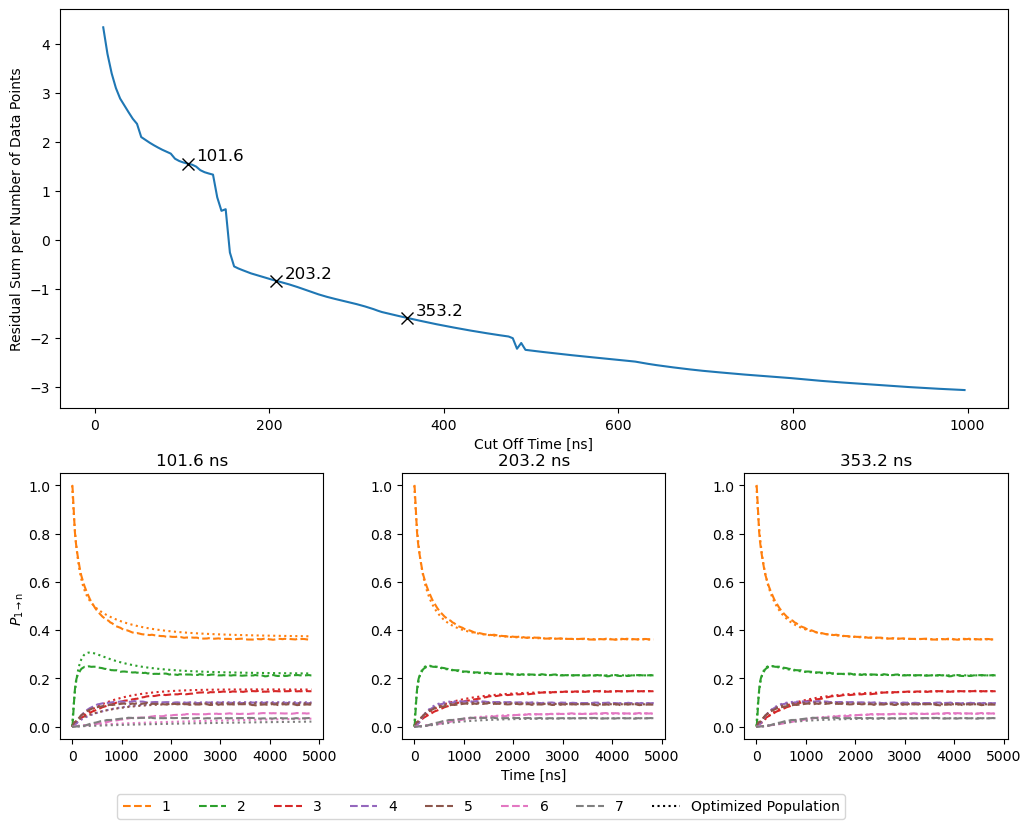

In [106]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/Divided_residuals/residualdivided_data.dat")
exc_data = np.loadtxt(exc_data_path)

from matplotlib import lines, pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.gridspec as gridspec

# Create data for the plots
  # Sample square data

# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(residual_data[:,0],np.log(residual_data[:,1]))
# ax0.set_title('Square Plot')
ax0.set_ylabel('Residual Sum per Number of Data Points')
ax0.set_xlabel('Cut Off Time [ns]')

ax0.plot(residual_data[20,0], np.log(residual_data[20,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[20,0]+10, np.log(residual_data[20,1]), '101.6', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(residual_data[41,0], np.log(residual_data[41,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[41,0]+10, np.log(residual_data[41,1]), '203.2', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(residual_data[72,0], np.log(residual_data[72,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[72,0]+10, np.log(residual_data[72,1]), '353.2', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub[0])
ax2 = plt.Subplot(fig, gs_sub[1])
ax3 = plt.Subplot(fig, gs_sub[2])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)

data_101 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/101.59317448676096_20.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_101[:,0],data_101[:,i], ":",color=c)
ax1.set_title('101.6 ns')

data_203 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/203.18634897352192_41.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_203[:,0],data_203[:,i], ":",color=c)

ax2.set_xlabel("Time [ns]")
ax2.set_title('203.2 ns')

data_353 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/353.1572255968357_72.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_353[:,0],data_353[:,i], ":",color=c)

ax3.set_title('353.2 ns')
ax3.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

fig.text(0.001, 0.25, r'$P_{\mathrm{1\rightarrow n}}$', va='center', rotation='vertical')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')

ax3.set_title('353.2 ns')

# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1, -0.3), borderaxespad=0, ncol=8)  # Adjust the values as needed

# Adjust spacing between subplots

plt.tight_layout(pad = 0.1)
plt.show()